### A Bird's Eye View of All LendingClub Loan Dataset and it's Exploratory Data Analysis from Kaggle Notebooks

<img src="https://i.ibb.co/9TswLbt/Denys-nevozhai-7nrs-Vjv-ALn-A-unsplash.jpg" alt="Denys-nevozhai-7nrs-Vjv-ALn-A-unsplash">

In [2]:
!pip install jovian --upgrade --quiet

In [4]:
!pip install opendatasets --quiet

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
import functools
import opendatasets as od
import matplotlib

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter(action='ignore')

In [7]:
# Set the global plotting parameters
sns.set_style('white')
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['figure.facecolor'] = '#00000000'

*******************************************************************************************************************************

**LendingClub** is an American peer-to-peer lending company, headquartered in San Francisco, California. It is the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. At its height, LendingClub is the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.
LendingClub enables borrowers to create unsecured personal loans between  1,000 𝑎𝑛𝑑 40,000. The standard loan period is three years. Investors are able to search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from the interest on these loans. LendingClub makes money by charging borrowers an origination fee and investors a service fee. 
-https://en.wikipedia.org/wiki/LendingClub

**our dataset of choice is the All LendingClub Loan Dataset**
[**Dataset**](https://www.kaggle.com/wordsforthewise/lending-club)

![](https://drive.google.com/uc?export=view&id=13xO5P23NpjukRCmWyylB72sNCfrhNnn9)

********************************************************************************

#### **let us import the data using opendatasets** 

opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command
[Link](https://pypi.org/project/opendatasets/)

In [8]:
lending_data_url="https://www.kaggle.com/wordsforthewise/lending-club"

In [9]:
od.download(lending_data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anubratadas
Your Kaggle Key: ··········


  0%|          | 0.00/1.26G [00:00<?, ?B/s]

100%|██████████| 1.26G/1.26G [00:11<00:00, 117MB/s]


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

![](https://drive.google.com/uc?export=view&id=1371DeLz7xKNNwdfkuGGDVNZfvzZLtJZU)

#### Exploratory Data Analysis (EDA) is an important initial assessement of the structure of the data

In most cases EDA consists of
* The physical structure of the data viz size,number of samples and features, presence/absence of missing values,whether the features are numerical or string objects, which all have a bearing on further analysis
* The distribution of data in individual features (normal/binomial/multimodal etc)
* The correlation of the features with each other
* Important inferences that can be obtained from the data with respect to the business goals for conducting the analysis

EDA forms the basis of further analysis by various ML algorithms. 
Our approach of EDA for the  All Lending Club Loan Dataset will follow the concept of Literature Review. 

<font color="#ff00ff">
 What is a Literature Review ?

A literature review is a piece of academic writing demonstrating knowledge and understanding of the academic literature on a specific topic placed in context.  A literature review also includes a critical evaluation of the material
 -University of Edinburgh
 </font>

EDA of this dataset has been conducted several times before at Kaggle and it would be illuminating to study them, for posing further queries and analyses. Just as the "Icefall Doctors" pave the way for mountaineers to summit Mt Everest, likewise this notebook attempts to describe the challenges with the dataset and encapsulate earlier attempts, for future adventerous Datascientists. The efforts in this notebook are to provide maximum possible information


In [ ]:
ls -lah ./lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv

ls: cannot access './lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv': No such file or directory


In [ ]:
ls -lah ./lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv

ls: cannot access './lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv': No such file or directory


In [ ]:
!wc -l accepted_2007_to_2018Q4.csv

2260702 accepted_2007_to_2018Q4.csv


In [ ]:
!wc -l rejected_2007_to_2018Q4.csv

wc: rejected_2007_to_2018Q4.csv: No such file or directory


### <font color="blue"> the dataset comprises of two .csv files </font>

1. **accepted_2007_to_2018Q4.csv is 1.6 GB csv file with 2.2 million rows**

2. **rejected_2007_to_2018Q4.csv is 1.5 GB csv file with 27 million rows**


### <font color="eb3480">A dataset with 30 million odd rows seems challenging ! How does the Lending Club Loan Dataset compare to other popular Kaggle Datasets  ?
</font>


**Popular Kaggle Datasets**

In [ ]:
# install the Kaggle API
!pip install kaggle --upgrade --quiet --force-reinstall --no-deps kaggle

In [ ]:
# set API authentication
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# kaggle API to download the datasets
!kaggle datasets list -v -s '^lending'|head -n 3

ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
wordsforthewise/lending-club,All Lending Club loan data,1GB,2019-04-10 18:03:34,23026,436,0.75
husainsb/lendingclub-issued-loans,LendingClub Issued Loans,179MB,2018-06-28 10:51:28,2658,44,0.7647059


In [ ]:
# code to fetch Kaggle datasets and append to file
for i in range (1,4):
  !kaggle datasets list --sort-by 'votes' -p $i -s ""  -v >> 'kaggle_datasets.csv'

In [ ]:
kaggle_datasets=pd.read_csv('kaggle_datasets.csv')

In [ ]:
kaggle_datasets.sort_values('voteCount',ascending=False).reset_index(drop=True).head(n=8)

,ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
0,allen-institute-for-ai/CORD-19-research-challenge,COVID-19 Open Research Dataset Challenge (CORD...,10GB,6/1/2021 15:23,125981,9420,0.882353
1,allen-institute-for-ai/CORD-19-research-challenge,COVID-19 Open Research Dataset Challenge (CORD...,10GB,6/1/2021 15:23,125988,9420,0.882353
2,mlg-ulb/creditcardfraud,Credit Card Fraud Detection,66MB,3/23/2018 1:17,325352,7967,0.852941
3,mlg-ulb/creditcardfraud,Credit Card Fraud Detection,66MB,3/23/2018 1:17,325303,7965,0.852941
4,sudalairajkumar/novel-corona-virus-2019-dataset,Novel Corona Virus 2019 Dataset,9MB,5/31/2021 6:05,327338,5479,0.970588
5,sudalairajkumar/novel-corona-virus-2019-dataset,Novel Corona Virus 2019 Dataset,9MB,5/31/2021 6:05,327314,5479,0.970588
6,shivamb/netflix-shows,Netflix Movies and TV Shows,1MB,1/18/2021 16:20,149381,5252,1.000000
7,shivamb/netflix-shows,Netflix Movies and TV Shows,1MB,1/18/2021 16:20,149319,5251,1.000000


In [ ]:
# function to convert size feature into numeric
def convert(item):
  if 'GB' in item:
    item=int(item[:-2])*1000
  elif 'MB' in item:
    item=int(item[:-2])  
  elif 'KB' in item:
    item=int(item[:-2])/1000  
  else:
    item=int(item)  
  return item

In [ ]:
# convert the text data to numeric data
kaggle_datasets['size']=kaggle_datasets['size'].map(convert)

In [ ]:
kaggle_votecount=kaggle_datasets.voteCount
kaggle_size=kaggle_datasets['size']
kaggle_download=kaggle_datasets.downloadCount

**Lending-club Dataset**

This dataset is one of the several versions of LendingClub datasets available on Kaggle. This is the most downloaded and voted

In [ ]:
!kaggle datasets list -s 'wordsforthewise/lending-club'

ref                           title                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------  --------------------------  ----  -------------------  -------------  ---------  ---------------  
wordsforthewise/lending-club  All Lending Club loan data   1GB  2019-04-10 18:03:34          23013        436  0.75             


In [ ]:
# for plotting a bar for lending-club in usability
x=[0.75 for num in range(18)]
y=[435 for num1 in range(30)]
z=[22981 for num2 in range(15)]
m=[1000 for num3 in range(6)]

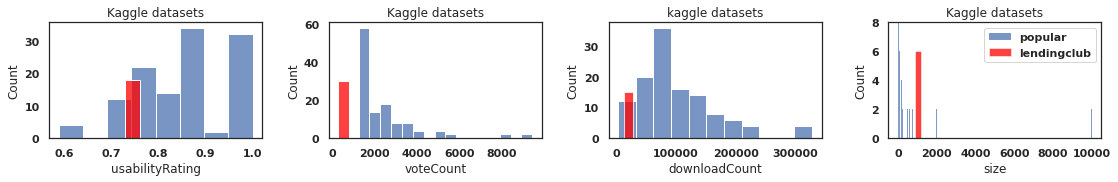

In [ ]:
fig,axes=plt.subplots(1,4,figsize=(16,3))
sns.histplot(kaggle_datasets.usabilityRating,ax=axes[0]);
sns.histplot(x,ax=axes[0],color='red',binrange=(0.73,0.76));
axes[0].set_title('Kaggle datasets')
sns.histplot(kaggle_votecount,ax=axes[1]);
sns.histplot(y,ax=axes[1],color='red',binrange=(300,800));
axes[1].set_title('Kaggle datasets')
sns.histplot(kaggle_datasets.downloadCount,ax=axes[2]);
sns.histplot(z,ax=axes[2],color='red',binrange=(14000,28000));
axes[2].set_title('kaggle datasets')
sns.histplot(kaggle_size,ax=axes[3]);
sns.histplot(m,ax=axes[3],color='red',binrange=(900,1200));
axes[3].set_ylim(0,8)
axes[3].set_title('Kaggle datasets')
plt.legend(["popular", "lendingclub"], loc ="upper right")
plt.tight_layout()

#### <font color="blue"> This dataset is unusually large at > 1 GB for each file and has high Usability Rating of 0.75, but has not been downloaded as prolifically (and therefore analyzed) as other popular datasets or has been upvoted as handsomely</font>


### <font color="eb3480"> What are the features of the dataset ?
</font>

#### **Loading the dataset in raw .csv format  fails**

**the kernel died in Binder attempting to read the data as an csv object of Apache Arrow**
* !pip install pyarrow
* from pyarrow import csv
* arrow_csv=csv.read_csv('accepted_2007_to_2018Q4.csv')

**the kernel died both in Binder as well as Google colab attempting to read the data as a Pandas csv object**
* pandas_csv=pd.read_csv('accepted_2007_to_2018Q4.csv')
* pd.read_csv('accepted_2007_to_2018Q4.csv',low_memory=True)

#### **Loading the dataset in .gz format improves the situation but takes a fair amount of time**

In [ ]:
%%time
accepted_url = "./lending-club/accepted_2007_to_2018Q4.csv.gz"
accepted_loans_df = pd.read_csv(accepted_url, compression='gzip',header=0, sep=',', quotechar='"')

<string>:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 16min 51s


In [ ]:
%%time
rejected_url = "./lending-club/rejected_2007_to_2018Q4.csv.gz"
rejected_loans_df = pd.read_csv(accepted_url, compression='gzip',header=0, sep=',', quotechar='"')

Wall time: 1h 6min 56s


**The Accepted Cases dataset loaded in 17 minutes and the Rejected Cases dataset loaded in 1 hour on Google colab engine. Phew!**

### <font color="eb3480"> Since the data is difficult to load, can we quickly find the features of the data ?
</font>

In [ ]:
!head -n 3 ./lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv>accepted_header.csv
!head -n 3 ./lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv>rejected_header.csv

### <font color='blue'>To quickly check for the features of the dataset, we can use Unix tools </font>

#### **the features of the accepted cases dataset**

In [ ]:
acceptedHead=pd.read_csv('accepted_header.csv').head(n=4)
acceptedHead

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Characteristics of the Data
data_type=acceptedHead.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,int64,1
1,float64,127
2,object,23


#### **the features of the rejected cases dataset**

In [ ]:
rejectedHead=pd.read_csv('rejected_header.csv').head(n=4)
rejectedHead

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [ ]:
# Characteristics of the Data
data_type=rejectedHead.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,float64,3
1,object,6


#### <font color='blue'> The features of this dataset are explained at this [link](https://https://www.kaggle.com/jonchan2003/lending-club-data-dictionary)

### <font color="eb3480">which features are common between accepted cases and rejected cases ?</font>

In [ ]:
rejected_columns=rejectedHead.columns.to_list()
accepted_columns=acceptedHead.columns.to_list()
[column for column in accepted_columns if column in rejected_columns]

[]

**common features in the 2 datasets**

In [ ]:
common_features=pd.DataFrame({"accepted_headings":['loan_amnt','title','dti','zip_code','addr_state','emp_length'],
 "rejected_headings":['Amount Requested','Loan Title','Debt-To-Income Ratio','Zip Code','State','Employment Length']})
common_features

,accepted_headings,rejected_headings
0,loan_amnt,Amount Requested
1,title,Loan Title
2,dti,Debt-To-Income Ratio
3,zip_code,Zip Code
4,addr_state,State
5,emp_length,Employment Length


### <font color='red'> The feature headings of the rejected cases and accepted cases do not match ???</font> 
####<font color='blue'>The features are named differently. The number features for Accepted Cases and Rejected cases are different. It is possible that  LendingClub could be following a 2 step verification process for approving loans. A quicker set of features to initially reject loans and then a more comprehensive set of features to approve the remaining loans. Also, several new features are monitered to track the status of the loans given. The rejected cases outnumber accepted cases 1:10 </font>

**For further analysis a sample of the dataset can be now created and saved as a seperate file. This will help in faster analysis**

**Advantages of sampling-**
* less time for analysis
* less consumption of resources like RAM,CPU,Disk space
* established techniques like simple random sampling, systematic sampling, stratified sampling, cluster sampling
* statistical tools like p-value, Power Analysis exist to determine the size of a sample

**But there can be disadvantages-**
* chance of bias
* sampling can be erroneous with imbalanced datasets

**A thumb rule is that the sample should be at least 10 % of the dataset**

In [ ]:
accepted_loans_df_sample=accepted_loans_df.sample(frac=0.2)

In [ ]:
rejected_loans_df_sample=rejected_loans_df.sample(frac=0.2)

In [ ]:
accepted_loans_df_sample.to_csv('lending_club_dataset_accepted_sample.csv')

In [ ]:
rejected_loans_df_sample.to_csv('rejected_loans_sample.csv')

### ![](https://drive.google.com/uc?export=view&id=1AWk9LZNLd8pnNDwQsiuL9HQraMRqakbB)  <font color="blue">  We realize that the dataset is large sized dataset and is difficult to load as a Pandas dataframe object. There is also a difference in the number of features of the 2 subsets of the data. There are 150 odd features and features like Risk Score and Debt-to-income ratio  needs domain knowledge for better analysis </font>

### <font color='blue'>**Now let us see the kernels in Kaggle which have attempted to study this dataset** </font>

#### <font color='blue'> There are 17 kernels attributed directly to this dataset, but we found at least 230 odd kernels which have attempted to study the LendingClub data and we have compiled them. However due to nonspecificity of the search string, there may be a false entries or some genuine kernels missing </font>

In [ ]:
# code to fetch Kaggle datasets and append to file
for i in range (1,18):
  !kaggle kernels list --sort-by 'voteCount' -p $i -s "lending-club"  -v >> 'kaggle_kernels_updated.csv'

In [10]:
# read the data in Pandas dataframe
lending_club_kernels=pd.read_csv('kaggleKernelsUpdated.csv',encoding='utf-8',error_bad_lines=False,parse_dates=True)

In [11]:
lending_club_kernels.shape

(340, 5)

In [12]:
import datetime

In [13]:
# convert the text data for notebook run time to Python datetime object and extract the year
lending_club_kernels['lastRunTime']=lending_club_kernels.lastRunTime.map(lambda x:x[:10])
lending_club_kernels['lastRunTime']=pd.to_datetime(lending_club_kernels['lastRunTime'])
lending_club_kernels['lastRunTime']=lending_club_kernels['lastRunTime'].dt.year

In [14]:
lending_club_kernels['logVotes']=lending_club_kernels.totalVotes.map(lambda x:np.log(x)if(x>0) else 0)

In [15]:
lending_club_kernels.head(n=3)

,ref,title,author,lastRunTime,totalVotes,logVotes
0,janiobachmann/lending-club-risk-analysis-and-m...,Lending Club || Risk Analysis and Metrics,Janio Martinez Bachmann,2018,791,6.673298
1,jaseziv83/clustering-to-help-club-managers,Clustering to Help Club Managers,JasonZivkovic,2019,301,5.707110
2,kabure/lending-club-insightful-financial-eda,Lending Club - Insightful Financial EDA,Leonardo Ferreira,2019,192,5.257495


#### D-Tale is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures. It integrates seamlessly with ipython notebooks & python/ipython terminals. Currently this tool supports such Pandas objects as DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex
-[D-Tale](https://pypi.org/project/dtale/#jupyterhub-w-jupyter-server-proxy)

On executing **dtale.show**, a separate browser window opens to show summmary statistics of the features of the dataframe. This library allows one to execute EDA on a dataframe with 1 line of code !

In [16]:
!pip install dtale --upgrade --quiet

     |████████████████████████████████| 14.4MB 15.8MB/s 
     |████████████████████████████████| 1.8MB 26.4MB/s 
     |████████████████████████████████| 19.1MB 150kB/s 
     |████████████████████████████████| 194kB 35.7MB/s 
     |████████████████████████████████| 79.9MB 40kB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
     |████████████████████████████████| 51kB 257kB/s 
     |████████████████████████████████| 645kB 17.1MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 358kB 40.5MB/s 
     |████████████████████████████████| 1.0MB 28.7MB/s 
     |████████████████████████████████| 3.5MB 32.2MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 1.8MB 19.5MB/s 


In [17]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [18]:
d=dtale.show(lending_club_kernels.sort_values('totalVotes',ascending=False).reset_index(drop=True))
d # click on the link to open the dataframe in the browser and view the statistics

2021-06-25 15:07:06,041 - INFO     - NumExpr defaulting to 2 threads.


https://0vqwbq1q0p2-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

**screenshot of the D-Tale output window**

![](https://drive.google.com/uc?export=view&id=1wIvJEkplbrv9Q-kaVgOZhuGlDbrfIUez)


In [ ]:
# check the dtale instances running
dtale.instances()

To gain access to an instance object simply pass the value from 'ID' to dtale.get_instance(ID)

ID Name                                     URL
 1       http://c317ad4a623a:40000/dtale/main/1
         http://c317ad4a623a:40000/dtale/main/1


In [19]:
# kill the dtale instances
d.kill()

###<font color="eb3480">What has been the level of interest in this dataset over a period of time?</font>

In [30]:
!pip install plotly matplotlib seaborn --quiet

In [33]:
import plotly.express as px
import plotly.graph_objects as go

In [34]:
fig = px.strip(data_frame=lending_club_kernels, x="lastRunTime", y="logVotes", title= "Kernels over time")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

ModuleNotFoundError: ignored

In [ ]:
fig=px.scatter(data_frame=lending_club_kernels,x="lastRunTime",y="logVotes",hover_name='author',color='author')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

### <font color="blue"> The dataset has seen a fair amount of interest with 230 odd attempts. The highest interest in the kernels was in 2019, a period of financial crisis and even now attempts are being made to analyze this data</font>

********************************************************************************

#### <font>Let us download these kernels and after studying the features of the dataset, we will study these kernels and compile and review the Data Analysis to understand the pattern in the data. There is a valid reason for exploring these kernels while conducting a Exploratory Data Analysis. Independently analyzing the data amounts to **"Reinventing the Wheel"** and contributes to unnecessary redundancy. Rather a review of the excellent efforts taken by the pioneers, will both motivate as well as guide the future Datascience enthusiast</font>

********************************************************************************

In [ ]:
import subprocess
import time

In [ ]:
# example of downloading a kaggle kernel using API
var='kaggle kernels pull janiobachmann/lending-club-risk-analysis-and-metrics'
subprocess.run(var,text=True,shell=True)

In [ ]:
# example of converting downloaded kaggle kernel to html
str_krnl='jupyter nbconvert --to html lending-club-risk-analysis-and-metrics.ipynb'
subprocess.run(str_krnl,text=True,shell=True)

In [ ]:
# convert the kaggle reference entries to a list
lending_club_list=lending_club_kernels.ref.tolist()

In [ ]:
# code to download the kernels
def notebook_html(html_list):    
    for kernel in html_list:
        time.sleep(1)
        var='kaggle kernels pull '+ str(kernel) # space is important after 'pull'
        #print(var)
        subprocess.run(var,text=True,shell=True)
        time.sleep(1)
        kernelBase=kernel.split('/')[1]+".ipynb"
        #print(kernelBase)
        str_krnl='jupyter nbconvert --to html '+ kernelBase # space is important after 'html'
        subprocess.run(str_krnl,shell=True,text=True) 
notebook_html(lending_club_list)        

In [ ]:
!mkdir lending_notebooks

In [ ]:
# linux commands to collect notebooks
!if [ ! -f "Jovian_EDA.ipynb"];
!then
!mv *.R *.ipynb *.sql ./lending_notebooks; 
!fi
!tar -zcvf lendingClub_notebooks.tar.gz lending_notebooks/

In [ ]:
# linux commands to zip html files 
!mkdir html
!mv *.html *.Rmd  *.irnb ./html
!tar -zcvf lendingClub_notebook_html.tar.gz html/

#### <font color='blue'> Due to the large size of the dataset, loading the data is a challenge and several of the top voted kernels have used a subsample of the dataset, which is unavailable now </font>

In [ ]:
loadingData=pd.read_csv('loading.csv',encoding="utf8")
loadingData

,Title,Author,dataframe_library,source,rows,remarks
0,Lending Club || Risk Analysis and Metrics,Janio Martinez Bachmann,Pandas,private datasource,887379,missing
1,Lending Club - Insightful Financial EDA,Leonardo Ferreira,Pandas,private datasource,100000,missing
2,Minimizing risks for loan investments,Pavlo Fesenko,Pandas,Data for year 2018,495242,missing
3,A Hitchhiker's Guide to Lending Club Loan Data,Pragyan Subedi,Pandas,private datasource,887379,missing
4,Lending Club Loan 💰Defaulters 🏃‍Prediction,Fares Sayah,Pandas,multiple data source,396030,Jean de Dieu Nyandwi
5,loan prediction-case study-DT && RF,Vahideh Dashti,Pandas,data for year 2007-15,9578,Shweta Shetye
6,Minimizing Risks for Loan Investments Keras – ANN,Tomas Mantero,Pandas,multiple data source,396030,Jean de Dieu Nyandwi
7,Prediction of LendingClub loan defaulters,Deepanshu Sharma,Pandas,data for year 2007-15,890000,missing
8,Lending Club-CHECK before you CHEQUE,Faraz Rahman,R readr,data for year 2007-15,887379,missing
9,Good or Bad Loan? (Draft),wsgt,Pandas,data for year 2007-15,600000,missing


![](https://drive.google.com/uc?export=view&id=1e3wyFaSy-oL1cu9550Qud225kASRL29G)

#### At present there are libraries such as Dask which offer parallel computing in Python and can run parallel dataframes, which helps in manipulating large datasets with lesser resources
[Link to the DASK website](https://docs.dask.org/en/latest/)

In [ ]:
cd lending-club/accepted_2007_to_2018q4.csv/

/content/lending-club/accepted_2007_to_2018q4.csv


In [ ]:
!pip install cloudpickle --quiet

In [ ]:
!pip install dask[complete] --quiet

In [ ]:
!pip install cloudpickle --quiet

In [ ]:
import dask
import dask.dataframe as dd

In [ ]:
from dask import delayed

In [ ]:
%%time
accepted_df=dd.read_csv('accepted*',parse_dates=True,low_memory=False,dtype={'desc': 'object','id': 'object','sec_app_earliest_cr_line': 'object'})

CPU times: user 162 ms, sys: 8.47 ms, total: 170 ms
Wall time: 177 ms


#### <font color="blue"> Loading the Accepted Cases dataset as a DASK dataframe has reduced the loading time from approximately 17 minutes  to less than 200 milliseconds </font>

In [ ]:
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Let us check the missing values in the dataset**

In [ ]:
%%time
null_value_accepted_df=accepted_df.isnull().sum().compute(low_memory=False)

CPU times: user 1min 34s, sys: 10.7 s, total: 1min 45s
Wall time: 1min 17s


In [ ]:
null_value_accepted_df=pd.DataFrame(null_value_accepted_df)

In [ ]:
null_value_accepted_df.columns=['NULL_VALUE']

In [ ]:
total_records=len(accepted_df)

In [ ]:
null_value_accepted_df.head(n=3)

,NULL_VALUE
id,0
member_id,2260701
loan_amnt,33


In [ ]:
# code to find the null values as an % of the total records
null_value_accepted_df['NULL_VALUE']= null_value_accepted_df.NULL_VALUE.map(lambda x:(x/total_records)*100)

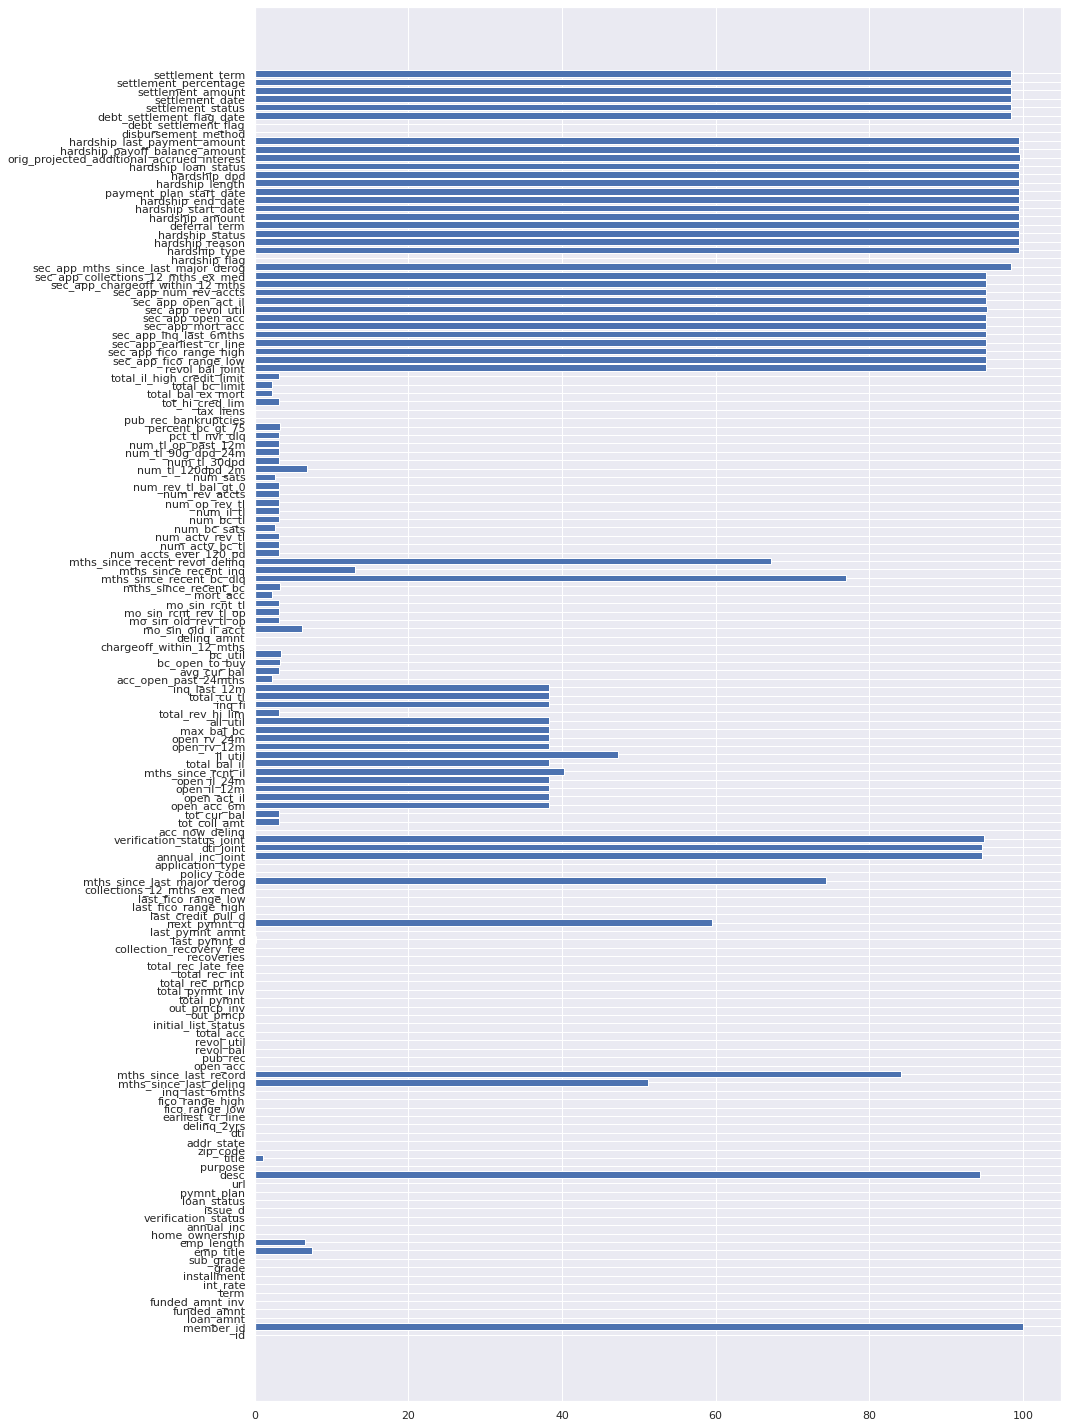

In [ ]:
fig, ax = plt.subplots(figsize=(15,20))
ax=plt.barh(null_value_accepted_df.index,null_value_accepted_df.NULL_VAL);
plt.tight_layout()
plt.show()

### <font color="blue">Almost 44 features in the accepted cases have more than 50% of the records missing, thus making these features untenable for further analysis. The member_id would have been removed for privacy purpose.</font>

In [ ]:
cd ../rejected_2007_to_2018q4.csv/

/content/lending-club/rejected_2007_to_2018q4.csv


In [ ]:
%%time
rejected_df=dd.read_csv('rejected*',parse_dates=True,low_memory=False)

CPU times: user 28.9 ms, sys: 2.05 ms, total: 30.9 ms
Wall time: 37.5 ms


#### <font color="blue">Loading the Rejected cases dataframe as a DASK dataframe reduced the loading time from 1 hour to 37 milliseconds !</font>

In [ ]:
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
%%time
null_value_rejected_df=rejected_df.isnull().sum().compute(low_memory=False)/len(rejected_df)

CPU times: user 1min 19s, sys: 4.99 s, total: 1min 24s
Wall time: 1min 23s


In [ ]:
null_value_rejected_df=pd.DataFrame(null_value_rejected_df)
null_value_rejected_df.columns=['NULL_VALUE']

In [ ]:
total_records_rejected=len(rejected_df)

In [ ]:
# code to find the null values as an % of the total records
null_value_rejected_df['NULL_VALUE']= null_value_rejected_df.NULL_VALUE.map(lambda x:(x/total_records_rejected)*100)

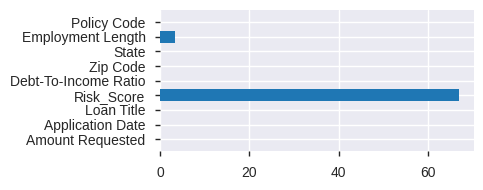

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
ax=plt.barh(null_value_rejected_df.index,null_value_rejected_df.NULL_VALUE);
plt.tight_layout()
plt.show()

### <font color="blue"> A striking observation in this subset is the missing Risk_Score in 66% of the cases. If this data has not been redacted, then for 18 million cases, the loan was rejected even without calculation a Risk Score. A cursory guess would be that Debt-to-Income Ratio and Employment Length would the key parameters for rejection, but this needs to be confirmed </font>

#### <font color='blue'> The rule of thumb is that the percentage of missing values in a column should not exceed 30 %,beyond which these columns should be dropped. Let us apply the rule to the dataset and see the outcome</font>

**accepted cases dataset**

In [ ]:
# code to filter out columns with >30 % NA values
%%time
lowNA_accept_df=accepted_df.loc[:,(accepted_df.isnull().sum().compute(low_memory=False)/len(accepted_df)<0.3)]

CPU times: user 2min 58s, sys: 10 s, total: 3min 8s
Wall time: 2min 16s


In [ ]:
lowNA_accept_df.shape

(Delayed('int-1bf1a66e-dade-4108-822e-afe3c932da87'), 93)

#### <font color='blue'>58 features have been removed from the accepted cases data. That is a substantial loss of information. Hence, it is desirable to further study individual features before removing it compeltely based on general guidelines</font>

**rejected cases dataset**

In [ ]:
# code to filter out columns with >70 % NA values
%%time
lowNA_reject_df=rejected_df.loc[:,(rejected_df.isnull().sum().compute(low_memory=False)/len(rejected_df)<0.3)]

CPU times: user 1min 14s, sys: 4.57 s, total: 1min 19s
Wall time: 1min 22s


In [ ]:
lowNA_reject_df.shape

(Delayed('int-a13674ce-29db-4164-b699-83aadbbac403'), 8)

#### <font color='blue'> One feature was removed for the rejected cases data subset</font>

###<font color ="eb3480">What is the inter-relationship between the numeric features in data ?


In [ ]:
%%time
# We have selected the numeric columns
numeric_accepted_df=accepted_df.select_dtypes(include=['float64'])

CPU times: user 5.18 ms, sys: 26 µs, total: 5.21 ms
Wall time: 8.76 ms


In [ ]:
%%time
# The member ID is used for indexing and unnecessary for analysis
numeric_accepted_df=numeric_accepted_df.drop(['member_id'],axis=1)

CPU times: user 15.8 ms, sys: 973 µs, total: 16.8 ms
Wall time: 22.8 ms


In [ ]:
%%time
# We are removing all rows with NA values
numeric_accepted_df=numeric_accepted_df.dropna(how='all')

CPU times: user 17 ms, sys: 0 ns, total: 17 ms
Wall time: 17.1 ms


In [ ]:
%%time
# We are removing all rows with duplicates.by default only the first row of the duplicate is retained
numeric_accepted_df=numeric_accepted_df.drop_duplicates()

CPU times: user 33 ms, sys: 983 µs, total: 34 ms
Wall time: 37.4 ms


In [ ]:
numeric_accepted_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,30.0,1.0,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,...,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,...,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,NaN,1.0,71000.0,13.85,0.0,0.0,189699.0,0.0,1.0,...,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,...,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,...,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
accepted_corr=numeric_accepted_df.corr().compute()

CPU times: user 13min 47s, sys: 23.2 s, total: 14min 10s
Wall time: 13min 27s


The system used a single DASK scheduler

### <font color="blue"> Correlation Plot </font>

<font color="blue"> A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

-Tim Bock
</font>
[displayr](https://www.displayr.com/what-is-a-correlation-matrix/)

In [ ]:
accepted_corr.shape

(112, 112)

Text(0.5, 1.0, 'Accepted Cases -Numeric Features Correlation')

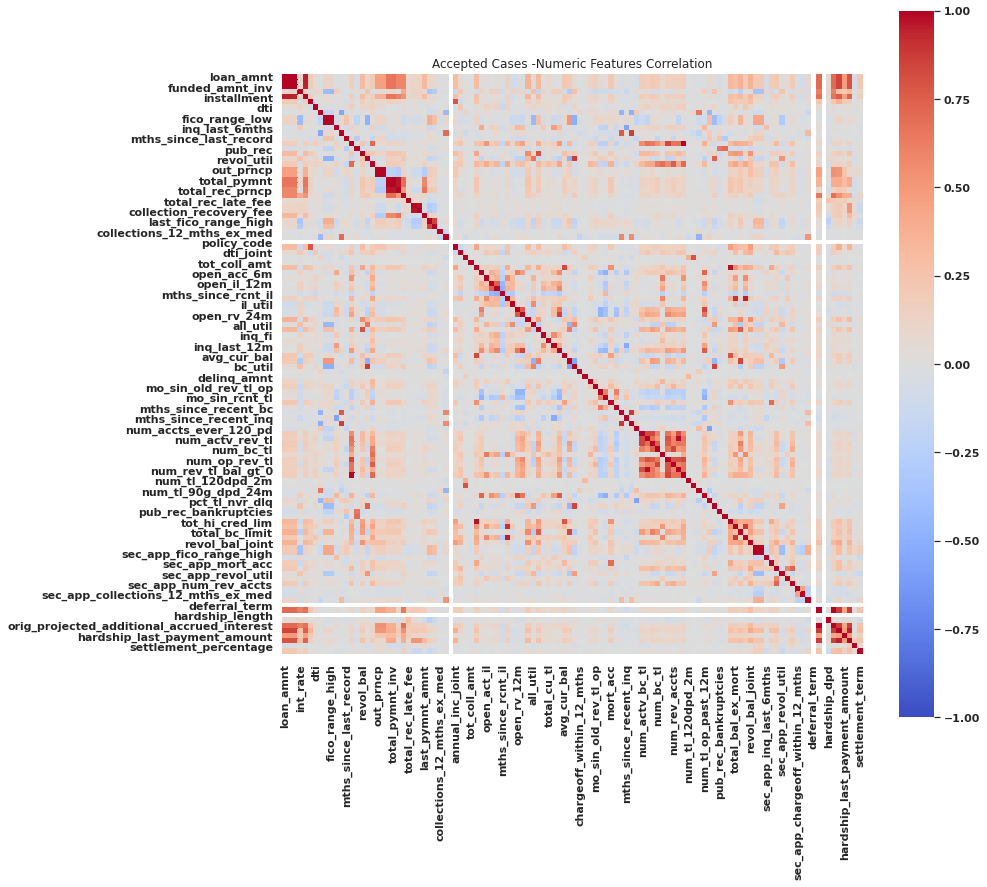

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(accepted_corr,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=True)
plt.title("Accepted Cases -Numeric Features Correlation")

### <font color="blue">While most features in the Accepted Cases Dataset show no correlation, some features show predominantly positive correlation</font>
### <font color="blue">The features prominenty showing positive correlation are
* Number of accounts ever 120 or more days past due
* Number of currently active revolving trades
* Number of bankcard accounts
* Number of open revolving accounts</font>
### <font color="blue">All these features relate to the activity of credit products that the creditors utilize and hence there is redundancy in this selection of features in this dataset </font>

### <font color="eb3480"> Does the sample size affect the outcome of the result. We will address this key question by collecting different sizes of subsamples and analyzing the outcome ?</font>

**40% sample size**

In [ ]:
num_accp_df_04=numeric_accepted_df.sample(frac=0.4)

In [ ]:
accp_corr_04=num_accp_df_04.corr().compute()

In [ ]:
# plt.figure(figsize=(13,13))
# sns.heatmap(accp_corr_04,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=False)
# plt.title("Accepted Cases 40% sample size-Numeric Features Correlation")

**20 % sample size**

In [ ]:
num_accp_df_02=numeric_accepted_df.sample(frac=0.2)

In [ ]:
accp_corr_02=num_accp_df_02.corr().compute()

In [ ]:
# plt.figure(figsize=(13,13))
# sns.heatmap(accp_corr_02,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=False)
# plt.title("Accepted Cases 20% sample size-Numeric Features Correlation")

**10% sample size**

In [ ]:
num_accp_df_01=numeric_accepted_df.sample(frac=0.1)

In [ ]:
accp_corr_01=num_accp_df_01.corr().compute()

In [ ]:
# plt.figure(figsize=(13,13))
# sns.heatmap(accp_corr_01,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=False)
# plt.title("Accepted Cases 10% sample size-Numeric Features Correlation")

**5% sample size**

In [ ]:
num_accp_df_005=numeric_accepted_df.sample(frac=0.05)

In [ ]:
accp_corr_005=num_accp_df_005.corr().compute()

In [ ]:
# plt.figure(figsize=(13,13))
# sns.heatmap(accp_corr_005,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=False)
# plt.title("Accepted Cases 5% sample size-Numeric Features Correlation")

![](https://drive.google.com/uc?export=view&id=1AWk9LZNLd8pnNDwQsiuL9HQraMRqakbB)
### <font color="blue"> We have run correlation plots with different fraction of sample sizes to detect if the results change with a change in sample size. From 10% sample size onwards in few cases (earmarked by arrows), there are differences in the correlation. However the overall relationships are robust even at 5 % of the total data size </font>

![](https://drive.google.com/uc?export=view&id=1cxi1mKrmHIm9YRZN6_wS3MIBInhcT2QQ)


**Let us run a similar analysis for the Rejected Cases dataset**

In [ ]:
rejected_df=rejected_df.dropna(how='any')

In [ ]:
rejected_df=rejected_df.drop_duplicates()

**based on our analysis we can safely take a 20% sample for the correlation**

In [ ]:
sample_rejected_df=rejected_df.sample(frac=0.2)

In [ ]:
sample_rejected_df=sample_rejected_df.compute()

In [ ]:
# converting the string values of the feature to numerical values
sample_rejected_df['Debt-To-Income Ratio']=sample_rejected_df['Debt-To-Income Ratio'].map(lambda x: float(x[:-1]))

In [ ]:
sample_rejct_corr_df=sample_rejected_df.loc[:,['Amount Requested','Risk_Score','Debt-To-Income Ratio']]

In [ ]:
#correlation
sample_rejct_corr_df.corr()

,Amount Requested,Risk_Score,Debt-To-Income Ratio
Amount Requested,1.000000,0.246186,-0.000139
Risk_Score,0.246186,1.000000,-0.001841
Debt-To-Income Ratio,-0.000139,-0.001841,1.000000


### <font color="eb3480">Since Risk Factor was missing in 66 % of the samples in the rejected dataset, what is the correlation of this feature with other features ?</font>

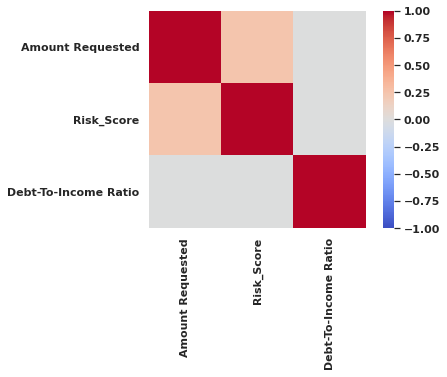

In [ ]:
sns.heatmap(sample_rejct_corr_df.corr(),vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,fmt="0.1f",cbar=True)

### <font color='blue'> In the rejected cases dataset, there is a poor correlation between Risk_Score and the other numerical features, which belies our earlier assumption. This underscores the need for careful evaluation of the data

**we can now work with the 20% sample**

In [ ]:
num_accp_df_02=numeric_accepted_df.sample(frac=0.2)

In [ ]:
%%time
num_accp_df_02=num_accp_df_02.compute()

CPU times: user 2min 23s, sys: 16.3 s, total: 2min 39s
Wall time: 1min 44s


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_num_accp_df_02=scaler.fit_transform(num_accp_df_02)

In [ ]:
scaled_num_accp_df_02=pd.DataFrame(scaled_num_accp_df_02)

In [ ]:
scaled_num_accp_df_02.columns=num_accp_df_02.columns

### <font color="eb3480">What is the pattern of distribution of the features in the Accepted Cases dataset ?</font>


#### Let us use D-Tale library to analyze the features in the Accepted Cases data subset

In [ ]:
dtale_app.USE_COLAB = True

n=dtale.show(scaled_num_accp_df_02)
n # click on the link to open the dataframe in the browser and view the statistics

https://yxsgaddho7j-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
# check the dtale instances running
dtale.instances()

To gain access to an instance object simply pass the value from 'ID' to dtale.get_instance(ID)

ID Name                                     URL
 1       http://c317ad4a623a:40000/dtale/main/1
         http://c317ad4a623a:40000/dtale/main/1
 2       http://c317ad4a623a:40000/dtale/main/2
         http://c317ad4a623a:40000/dtale/main/2


In [ ]:
# kill the dtale instances
n.kill()

#### <font color='blue'> Many of the features show positively skewed distribution with extremely long tails. This skewness causes what is called as class imbalance, where a major set of samples have values in a narrow range while many other samples have values over a wide  range and are very low in quantity. This calls for chooing proper metrics like sensitivity and specificity for predicting the less abundant classes, otherwise these samples tend to get misclassified
[check out this article by Faizan Ahemad](https://towardsdatascience.com/selecting-the-right-metric-for-skewed-classification-problems-6e0a4a6167a7)

### <font color="eb3480">What is the variability of the features in the Accepted Cases dataset ?</font>


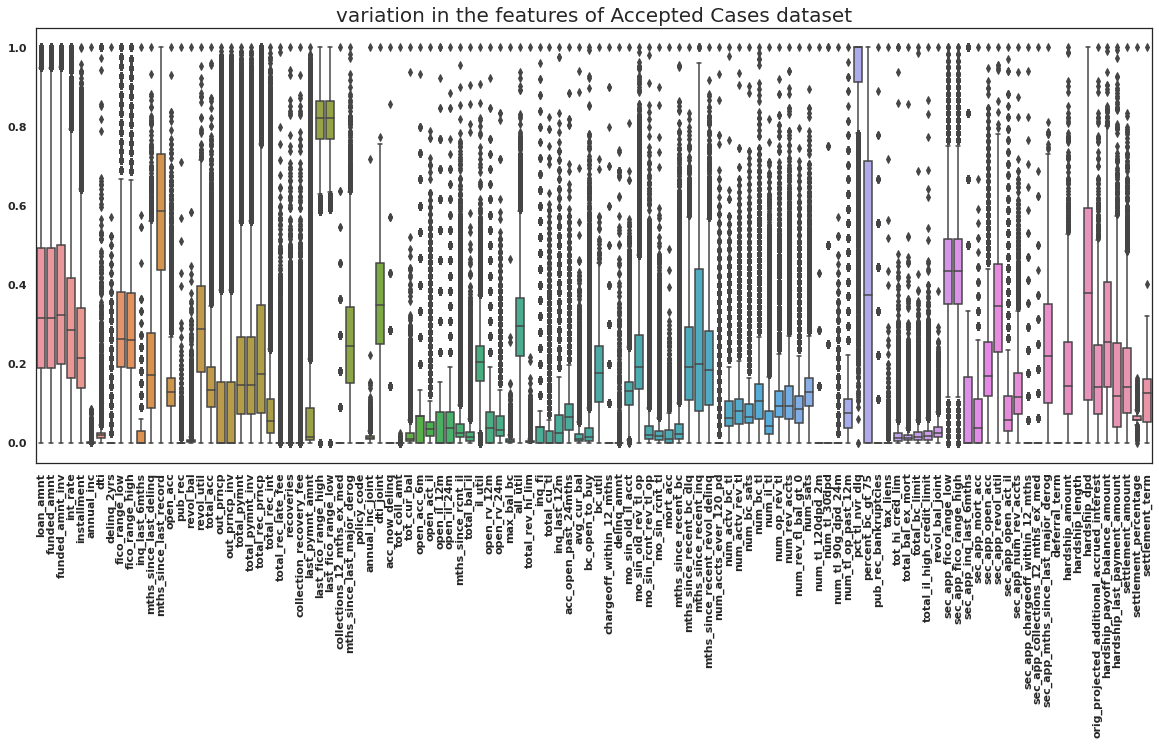

In [ ]:
plt.figure(figsize=(20,8))
s=sns.boxplot(data=scaled_num_accp_df_02);
s.set_xticklabels(scaled_num_accp_df_02.columns,rotation=90);
plt.title("variation in the features of Accepted Cases dataset",fontsize=20);

### <font color='blue'>The dataset has variability in each of it's numerical features. This attribute will help in choosing the features for further analysis</font>

### <font color='blue'>Getting back to the kernels, let us extract the text based inference from the kernels for futher analysis.Our own analysis shows that the dataset has missing values and outliers in several features </font>

In [ ]:
# unzipping the previously obtained notebooks in html format
!tar -xvf lendingClub_notebook_html.tar.gz

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
import os
os.chdir('./html')

In [ ]:
html_file_list=os.listdir()

In [ ]:
# function to extract the text in the notebooks
def html_text(file):  
  remark_list=[] 
  try:
      if 'html' in file:
          print(file)
        with open (file,'rb') as f:
          html=f.read()
          soup=bs(html)
          print(soup.title.text)
          remark=soup.body.div.find_all(class_="text_cell_render border-box-sizing rendered_html",recursive=True)
          remark_list.append(remark)

  except AttributeError:
    print('attribute not found')
  else:
      if file==None:
          print('no content') 
  return remark_list          

In [ ]:
# the extracted text is saved in the file "eda_inference.txt"
with open('eda_inference.txt','a') as fh:
  for file in html_file_list:
    remark_list=html_text(file)
    for tags in remark_list:
      for tag in tags:
        fh.write(tag.get_text())

lending-club-loan-data-analysis-first-submission
defaulted-loan-prediction
lendingclubhwcs06draftwork
lending-club-loan-multiple-algorithms
risk-classification-using-lending-club-dataset
grid-search-deep-learning-parameters
ai-club-classification-tree-mushroom-example
lending-club-business-metrics-in-p2p-space
loan-predictive-analysis
pyspark-beginners-lending-club-rejected-loans
columns-available-at-origination-answer
lending-club-loan-classification
ann-model-for-client-loan-classification
analyze-lending-loan-club
lending-club-loan-machine-learning
understanding-lending-club-s-data-with-eda
notebook-119d5a92add5a1090032
loan-repayment-prediction
lending-club-dataset-eda-modelling
loan-data-of-lending-club
a-gentle-eda-risk-loan-classification
chapter5
lending-club-notes-for-a-potential-investor
keras-exercises-lending-club
web-club-kaggle-session-3-eda
decision-trees-and-random-forest
svm-loan-lendingclub-com
info-gathered-from-clubhouse-dataset
feature-engineering-on-numerical-vari

In [ ]:
# the edited html files are saved
!tar cfvz revised_lendingClub_notebook_html.tar.gz html/


### Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP
-Joanna Jablonski

www.realpython.com
[source](https://realpython.com/nltk-nlp-python/)

### we will use this library to parse the text extracted from the LendingClub analysis notebooks to understand the insights gained in these kernels and summarize our exploration

In [ ]:
!pip install nltk==3.5 --quiet

     |████████████████████████████████| 1.4MB 3.9MB/s 


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
#load the extracted text
with open('eda_inference.txt','r') as fh:
  eda_txt=fh.read()

In [ ]:
eda_txt[:200]

'\nLending Club Loan Data Analysis¶\n\nData Cleaning and Exploratory Analysis¶In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are me'

**this code removes the punctuations from the text**

In [ ]:
# import string punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# many features have underscores and underscores will not be filtered
revised_string_punctuation='!"#$%&\'()*+,-./:;<=>?@[\]^`{|}~'

In [ ]:
no_punct_txt=[charac for charac in eda_txt.replace('\n',' ') if charac not in revised_string_punctuation]

In [ ]:
no_punct_txt = ''.join(no_punct_txt)

In [ ]:
no_punct_txt[:200]

' Lending Club Loan Data Analysis¶  Data Cleaning and Exploratory Analysis¶In machine learning you clean up the data and turn raw data into features from which you can derive the pattern There are meth'

**tokenization of text**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_sentences=sent_tokenize(no_punct_txt)

In [ ]:
tokenized_words=word_tokenize(no_punct_txt)

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**removal of stop words**

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_eda_words = [word for word in tokenized_words if word.casefold() not in stop_words]

#### <font color="blue"> using the tools of NLTK, we have created a list of words for further analysis</font>

### <font color="eb3480">What is the distribution of words in the text of notebooks which analyzed Lending Club data ?</font>

In [ ]:
 from nltk import FreqDist

In [ ]:
tokenized_freq_dist = FreqDist(filtered_eda_words)

In [ ]:
print(tokenized_freq_dist)

<FreqDist with 14540 samples and 115069 outcomes>


#### <font color="blue"> The words in the text from the Jupyter notebooks were distributed into 14540 distinct words</font>

#### <font color="eb3480"> Which features from the Accepted cases dataset were most analyzed ? </font>

In [ ]:
term_keys=tokenized_freq_dist.keys()
term_occurence=tokenized_freq_dist.values()
tokenized_freq_dist=pd.DataFrame({"term":term_keys,"frequency":term_occurence})

In [ ]:
# feature names of the Accepted Cases Dataset
accepted_cols=pd.read_csv("accepted_header.csv").columns

In [ ]:
# match the features of Accepted Cases with the terms found from the text
acp=tokenized_freq_dist[tokenized_freq_dist.term.isin(accepted_cols)] 

In [ ]:
acp_list=acp.term.tolist()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
token_string=" ".join(acp_list)

In [ ]:
wc=WordCloud(background_color=(255,241,241)).generate(token_string)

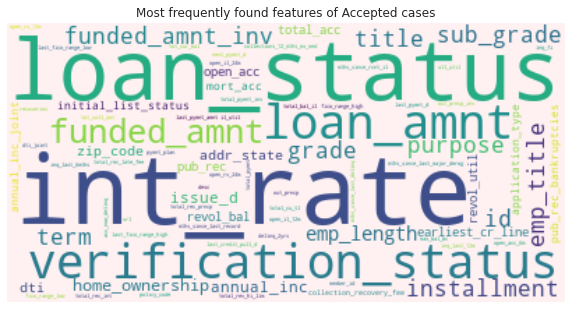

In [ ]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title('Most frequently found features of Accepted cases')
plt.show()

#### <font color="blue">Viola! our efforts of following the pioneers pays off. As we can see interest rate, loan status,loan amount, verification status, funded amount, employee title form the most studied features. It would be instructive to further study these features </font>

#### <font color="eb3480"> Which features from the Rejected cases dataset were most analyzed ? </font>

In [ ]:
# feature names of the Rejected Cases Dataset
rejected_cols=pd.read_csv("rejected_header.csv").columns

In [ ]:
# match the features of Rejected Cases with the terms found from the text
rcp=tokenized_freq_dist[tokenized_freq_dist.term.isin(rejected_cols)] 

In [ ]:
# only the term state is present in the analysis
rcp

,term,frequency
1088,State,13


#### <font color="blue"> we were expecting Risk_Score to figure in the analysis, but it's absence indicates, this feature was removed owing to 66% missing values</font> 

In [ ]:
tokenized_freq_dist.shape

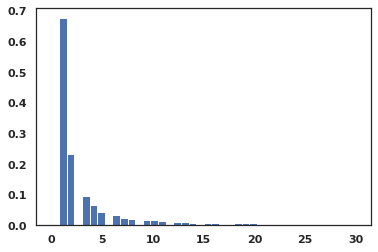

In [ ]:
plt.hist(tokenized_freq_dist.frequency,bins=40,range=(0,30),density=True);

#### <font color='blue'> The text analysis shows 14540 unique words distributed amongst all the analysis. Of which, from the frequency distribution above, we can see that few words are frequently used words form a small part of the text, while majority of the words used are unique. The presence of a larger proportaion of unique words indicates that most kernels have attempted to provide unique insights and the prospective datascientists should keenly study these kernels 

In [ ]:
tokenized_freq_dist['freq_ratio']=tokenized_freq_dist.frequency.map(lambda x:x/sum(tokenized_freq_dist.frequency))

In [ ]:
top_001_freq_dist=tokenized_freq_dist[tokenized_freq_dist.freq_ratio>0.001].sort_values('freq_ratio',ascending=False)

#### <font color="eb3480">What do the frequenty used words in the kernels tell of the dataset ? </font>

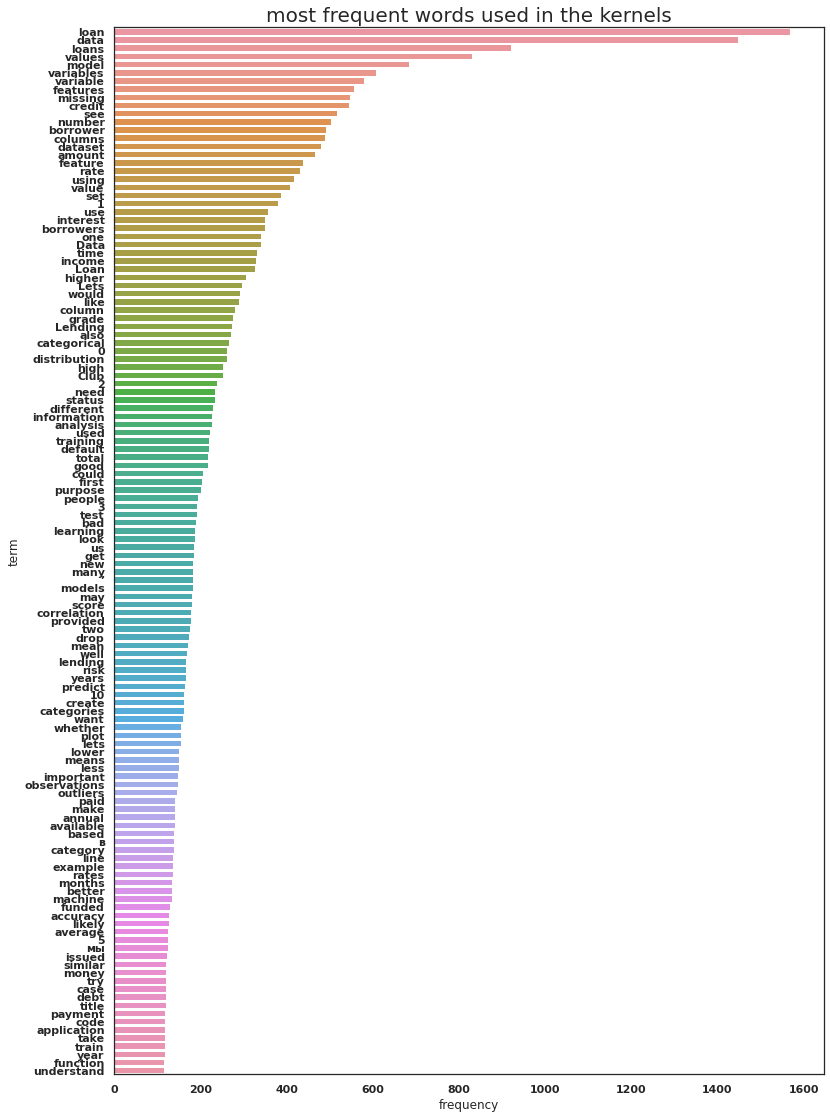

In [ ]:
plt.figure(figsize=(12,16))
fq=sns.barplot(data=top_001_freq_dist,x="frequency",y="term",orient="h");
plt.title("most frequent words used in the kernels",fontsize=20);
plt.tight_layout()
plt.show()

#### <font color="blue"> The words "good" and "bad" among freqeuntly used words show that obvious efforts were made to study features which can distinguish the accepted cases and rejected cases. efforts have been made to study the categorical features, outliers, missing values and correlation between numerical values. Most authors have focused on interest rate, amount loaned, the duration of the loan, income of the borrower, the grade and status of the loan. Interestingly authors have also commented on the risk on the loans, a feature we could not earlier trace lexically</loan> 

#### <font color="eb3480">Can we learn something from the most frequent phrases ?</font>

#### n-grams are statistical word models based on the number of words paired.
* "hello" - unigram
* "hello there" - bigram
* "hello there Jovian" -trigram

 n-grams are used for auto completion, auto spell check and finding the importance of phrases using the tf-idf algorithm.
 Here we will use bigrams, the most prevalent n-gram model to study patterns in the text

In [ ]:
bigrams_eda_text=pd.Series(nltk.ngrams(filtered_eda_words,2))

In [ ]:
bigrams_eda_text.name='bigrams'

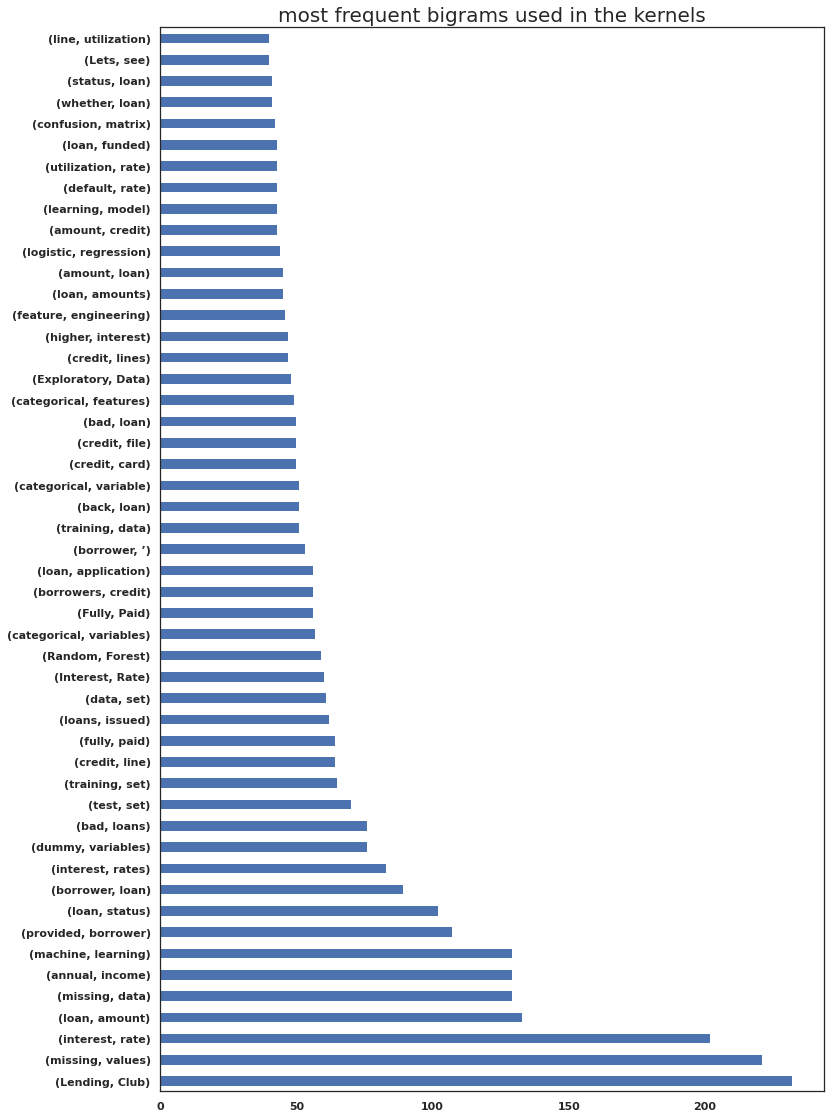

In [ ]:
plt.figure(figsize=(12,16))
fx=bigrams_eda_text.value_counts(ascending=False,sort=True).head(n=50).plot(kind="barh");
plt.title("most frequent bigrams used in the kernels",fontsize=20);
plt.tight_layout()
plt.show()

#### <font color ="blue">The bigrams also show similar inferences as the word analysis. Interest rate, loan amount, income, loan status, paid status are important
  </font>

### <font color="blue">Conclusion</font>
#### <font color="blue"> Finally we wind up our analysis. We studied the dataset and the kernels which addressed this dataset and understood the pertinent features of the dataset. Here is the  [link](https://drive.google.com/file/d/1wbJar7kN8vxbzjZy9Q0vPNEy9NFu450u/view?usp=sharing) to the extracted text and the [link](https://drive.google.com/file/d/15t3PD-BxVnjhHQVoQMpv9kFHE8wb4AEv/view?usp=sharing) to the html version of the kaggle notebooks. Datascientists are strongly urged to read the kernels before attempting Machine Learning approaches. The dataset is large, but could be conveniently manipulated as a DASK dataframe. Using a graphic web page based EDA tool like D-Tale, greatly helped in analyzing the dataset and distribution of the data. As a final step, let us merge the Accepted cases and Rejected cases datasets, on common features and analyze the distribution among the 2 subtypes  

In [ ]:
import jovian
jovian.commit(project="jovian-eda") 

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/anubratadas/jovian-eda


'https://jovian.ai/anubratadas/jovian-eda'

#### <font color="eb3480">Can we discriminate between accepted cases and rejected cases based on common features of the 2 data subsets ?</font>

In [ ]:
# import the Regular Expression library
import re

#### Now we begin a series of data remodelling to collect all relevant features

##### First we handle the accepted cases sub dataset

In [ ]:
# collect a 10% sample of the dataset
accpt_df_plt=accepted_df.sample(frac=0.1)
# select the relevant columns
a=accpt_df_plt[['loan_amnt','dti','emp_length']]
# convert the DASK dataframe to Pandas dataframe
accpt_smpl=a.compute()

In [ ]:
accpt_smpl.shape

(226071, 3)

In [ ]:
# convert the data to csv file for subsequent easier loading
accpt_smpl.to_csv("accpt_smpl.csv",header=True)

#####  we will carry out similar operations with the rejected cases sub dataset

In [ ]:
rejct_df_plt=rejected_df.sample(frac=0.01)
b=rejct_df_plt[['Amount Requested','Debt-To-Income Ratio','Employment Length']]
rejct_smpl=b.compute()

In [ ]:
rejct_smpl.to_csv("rejct_smpl.csv",header=True)

In [ ]:
rejct_smpl.shape

(276489, 3)

##### reloading accepted cases data from csv file

In [ ]:
a=pd.read_csv('accpt_smpl.csv')
a=a[['loan_amnt','dti','emp_length']]
a.head(n=2)

,loan_amnt,dti,emp_length
0,20000.0,32.34,5 years
1,22000.0,8.25,1 year


In [ ]:
# function to extract numbers from string
def txtNum(item):
  tn=re.findall('[0-9]+', str(item))
  if tn:
    return(int(tn[0]))
  else:
    return int(0)

In [ ]:
#update dataframe with integer values for emp_length
a['emp_length']=a.emp_length.map(txtNum)
a['dti']=a.dti.map(txtNum)
# add a feature to distinguish accepted cases
a['status']="yes"
a.dropna(how="any",inplace=True)

##### A quick and dirty visualization of the individual features

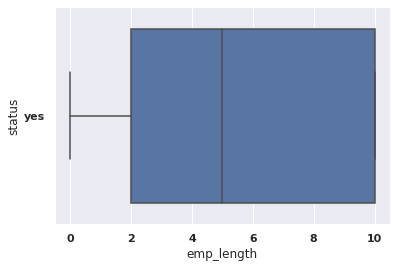

In [ ]:
sns.boxplot(x=a["emp_length"], y=a["status"]);
plt.title('accepted cases')

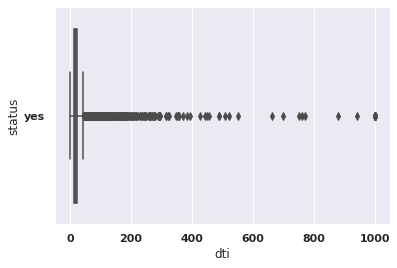

In [ ]:
sns.boxplot(x=a["dti"], y=a["status"]);

##### reloading rejected cases data from csv file

In [ ]:
b=pd.read_csv('rejct_smpl.csv')
b=b[['Amount Requested','Debt-To-Income Ratio','Employment Length']]
b.columns=['loan_amnt','dti','emp_length']
b.head(n=2)

,loan_amnt,dti,emp_length
0,11000.0,27.95%,9 years
1,1000.0,4.5%,< 1 year


In [ ]:
import math

In [ ]:
#update dataframe with integer values for emp_length
b['emp_length']=b.emp_length.map(txtNum)
b['dti']=b.dti.map(txtNum)
# add a feature to distinguish rejected cases
b['status']="no"
b.dropna(how="all",inplace=True)

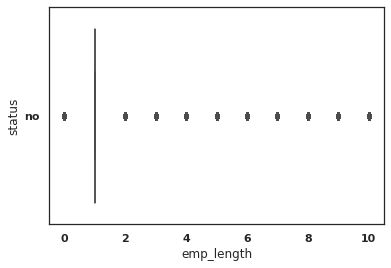

In [ ]:
sns.boxplot(x=b["emp_length"], y=b["status"]);
plt.title('rejected cases')

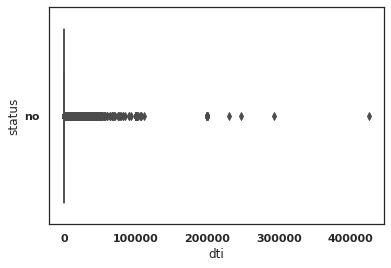

In [ ]:
sns.boxplot(x=b["dti"], y=b["status"]);

### <font color="blue">Pitfalls in Data
In the Rejected cases dataset a dti value is exceptionally high. we are checking the validity of this observation</font>

In [ ]:
# the maximum value of dti with dti as object 
b.dti.max()

'99999%'

In [ ]:
# the maximum value of dti with dti as numeric object
b.dti.max()

426000

In [ ]:
bdti=b.dti.to_list()

In [ ]:
# there is an entry for 426000 in the rejected cases dataset
[val for val in bdti if re.match('4260+%$',val)]

['426000%']

#### <font color='blue'> There are outliers in the dti values in both the accepted cases and rejected cases.The value of 426000 in rejected cases is an extreme case</font>

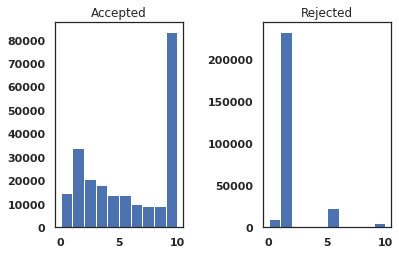

In [ ]:
fig,(axs1,axs2)=plt.subplots(nrows=1,ncols=2)
axs1.hist(a.emp_length);
axs1.set_title('Accepted')
axs2.hist(b.emp_length);
axs2.set_title('Rejected')
plt.tight_layout()
plt.show()

#### <font color='blue'> The distribution of lenght of service among the *accepted cases* and *rejected cases* is obvious. Most candidates whose loans were rejected has service life less than 1 year, while most Accepted cases had service life of more than 1 year


In [ ]:
# numeric description of accepted cases with outliers
a.describe()

,loan_amnt,dti,emp_length
count,226067.000000,226067.00000,226067.000000
mean,15045.327602,18.32777,5.645464
std,9175.045039,14.17616,3.770818
min,500.000000,0.00000,0.000000
25%,8000.000000,11.00000,2.000000
50%,13000.000000,17.00000,5.000000
75%,20000.000000,24.00000,10.000000
max,40000.000000,999.00000,10.000000


In [ ]:
# numeric description of rejected cases with outliers
b.describe()

,loan_amnt,dti,emp_length
count,276489.000000,276489.000000,276489.000000
mean,13170.962631,137.380775,1.521395
std,15090.428092,2737.702120,1.659269
min,0.000000,0.000000,0.000000
25%,5000.000000,8.000000,1.000000
50%,10000.000000,19.000000,1.000000
75%,20000.000000,36.000000,1.000000
max,300000.000000,426000.000000,10.000000


#### <font color='blue'> This code to remove outliers and reset the features to 1.5 times interquartile range is adapted from @saurabh48782 at www.geeksforgeeks.org </font>
[link for code] (https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/)

In [ ]:
# Code for Removing the outliers
def removeOutliers(data, col):
  print(data.shape)
  Q3 = np.quantile(data[col], 0.75)
  Q1 = np.quantile(data[col], 0.25)
  IQR = Q3-Q1

  print("IQR value for column %s is: %s" % (col, IQR))
  #global outlier_free_list
  #global filtered_data
  lower_range = Q1 - 1.5 * IQR
  print(f"lower range {lower_range}")
  upper_range = Q3 + 1.5 * IQR
  print(f"upper range {upper_range}")
  outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
  data[col]=pd.Series(outlier_free_list)
  #filtered_data = data.loc[data[col].isin(outlier_free_list)]
  return data

In [ ]:
a=removeOutliers(a,'dti')
a=removeOutliers(a,'loan_amnt')
a=removeOutliers(a,'emp_length')

(222488, 4)
IQR value for column dti is: 13.0
lower range -8.5
upper range 43.5
(222488, 4)
IQR value for column loan_amnt is: 12000.0
lower range -10000.0
upper range 38000.0
(222488, 4)
IQR value for column emp_length is: 8.0
lower range -10.0
upper range 22.0


In [ ]:
#  outliers are removed in accepted samples
a.describe()

,loan_amnt,dti,emp_length
count,222488.000000,224002.000000,226063.000000
mean,14645.999784,17.774493,5.645400
std,8685.804556,8.574079,3.770817
min,500.000000,0.000000,0.000000
25%,8000.000000,11.000000,2.000000
50%,12500.000000,17.000000,5.000000
75%,20000.000000,24.000000,10.000000
max,37950.000000,43.000000,10.000000


In [ ]:
# removing outliers in rejected samples
b=removeOutliers(b,'loan_amnt')
b=removeOutliers(b,'dti')
b['emp_length']=b.emp_length.map(lambda x:np.float64(x))
b.dropna(how="any",inplace=True)

(276489, 4)
IQR value for column loan_amnt is: 15000.0
lower range -17500.0
upper range 42500.0
(276489, 4)
IQR value for column dti is: 28.0
lower range -34.0
upper range 78.0


In [ ]:
# outliers are removed from the rejected cases dataset 
b.describe()

,loan_amnt,dti,emp_length
count,251861.000000,251861.000000,251861.000000
mean,12502.079369,20.282203,1.483711
std,10663.678381,16.682394,1.629744
min,0.000000,0.000000,0.000000
25%,5000.000000,6.000000,1.000000
50%,10000.000000,17.000000,1.000000
75%,20000.000000,31.000000,1.000000
max,42475.000000,77.000000,10.000000


In [ ]:
accep_emp_counts=a.emp_length.value_counts().items()

In [ ]:
emplen=[]
lencnt=[]
for idx,cnt in accep_emp_counts:
  emplen.append(int(idx))
  lencnt.append(cnt)

In [ ]:
# create a dataframe of the number of employees per year of employment
accep_emp_df=pd.DataFrame({"emp_length":np.float64(emplen),"emp_count":lencnt})

In [ ]:
# calculate the debt-to-income ratio and loan amount for each aggregated years of employment
accep_smpldf=a.groupby('emp_length').agg({'dti': 'mean', 'loan_amnt': 'mean'}).reset_index(level=0)

In [ ]:
accep_smpldf=pd.merge(accep_smpldf,accep_emp_df,left_on="emp_length",right_on="emp_length")

In [ ]:
accep_smpldf["status"]="accept"

In [ ]:
accep_smpldf

,emp_length,dti,loan_amnt,emp_count,status
0,0.0,17.828431,14122.072484,14210,accept
1,1.0,17.779014,14518.269260,33165,accept
2,2.0,17.682888,14546.211857,20056,accept
3,3.0,17.768015,14557.585745,17902,accept
4,4.0,17.880638,14679.930586,13614,accept
5,5.0,17.653979,14647.088272,13583,accept
6,6.0,17.646447,14584.371215,9908,accept
7,7.0,17.867380,14696.414136,9154,accept
8,8.0,17.623198,14662.544356,9018,accept
9,9.0,17.803005,14849.398319,7853,accept


In [ ]:
accep_smpldf.to_csv("accepted_composite.csv",header=True)

##### Similarly we proceed to aggregate the employees per number of years employed for the rejected cases

In [ ]:
rejec_emp_counts=b.emp_length.value_counts().items()

In [ ]:
emplen=[]
lencnt=[]
for idx,cnt in rejec_emp_counts:
  emplen.append(int(idx))
  lencnt.append(cnt)

In [ ]:
rejec_emp_df=pd.DataFrame({"emp_length":emplen,"emp_count":lencnt})

In [ ]:
rejec_smpldf=b.groupby('emp_length').agg({'dti': 'mean', 'loan_amnt': 'mean'}).reset_index(level=0)

In [ ]:
rejec_df_emplen=pd.merge(rejec_smpldf,rejec_emp_df,left_on='emp_length',right_on='emp_length')

In [ ]:
rejec_df_emplen["status"]="reject"

In [ ]:
rejec_df_emplen

,emp_length,dti,loan_amnt,emp_count,status
0,0.0,20.876488,12492.382419,9493,reject
1,1.0,20.267351,12483.867788,232689,reject
2,2.0,19.885285,12361.273458,1870,reject
3,3.0,19.900867,12655.468750,1733,reject
4,4.0,20.859054,12626.452537,1223,reject
5,5.0,20.442927,12347.627171,22911,reject
6,6.0,18.511401,12647.776074,656,reject
7,7.0,19.272189,12941.088180,534,reject
8,8.0,18.394619,12469.857143,701,reject
9,9.0,20.726316,12252.259036,498,reject


In [ ]:
rejec_df_emplen.to_csv("rejected_composite.csv",header=True)

#### <font color="blue">A merged dataset is created from the common numeric values from Accepted Cases and Rejected Cases datasets</font>

In [ ]:
merged_accept_reject_df=pd.concat([a,b],ignore_index=True,axis=0,verify_integrity=True)

In [ ]:
merged_accept_reject_df.head(n=3)

,loan_amnt,dti,emp_length,status
0,20000.0,32.0,5.0,yes
1,22000.0,8.0,1.0,yes
2,15000.0,7.0,10.0,yes


In [ ]:
merged_accept_reject_df.tail(n=3)

,loan_amnt,dti,emp_length,status
474346,5000.0,31.0,1.0,no
474347,40000.0,13.0,5.0,no
474348,2000.0,56.0,0.0,no


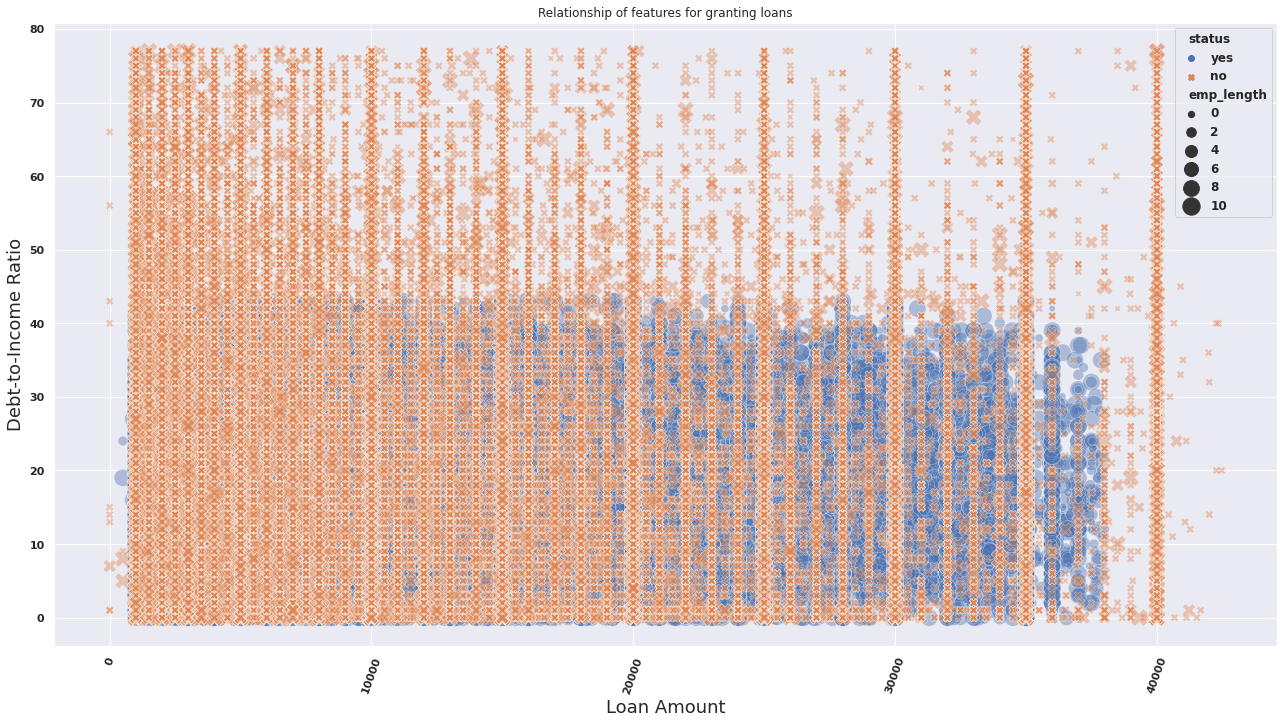

In [ ]:
fig,axs=plt.subplots(figsize=(18,10))
plt.xticks(rotation=70)
sns.set(font_scale=1)
ax=sns.scatterplot('loan_amnt','dti',data=merged_accept_reject_df,hue='status',size='emp_length',sizes=(40,300),alpha=0.4,style="status")
ax.set_xlabel('Loan Amount',fontsize=18)
ax.set_ylabel('Debt-to-Income Ratio',fontsize=18)
plt.tight_layout()
plt.title('Relationship of features for granting loans')
plt.show()

#### <font color="blue">All successful cases have low Debt-to-Income Ratio (dti) and longer years of service. Interestingly these people also requested higher loans. The individuals who failed to obtain loans have usually applied for smaller amounts and yet their cases were rejected. However, if we note keenly there are exceptions where individuals with low dti and longer years of service have failed to secure even loans less than $ 10000.00. Were they defaulters ? only more data can tell this

#### <font color="eb3480">Debt-to-Income Ratio and period of employment determine loan sanctions, but can we improve the insight?</font>

In [ ]:
emp_accp_df=pd.read_csv('accepted_composite.csv')
emp_rejc_df=pd.read_csv('rejected_composite.csv')

In [ ]:
emp_accp_df=emp_accp_df.drop('Unnamed: 0',axis=1)

In [ ]:
emp_rejc_df=emp_rejc_df.drop('Unnamed: 0',axis=1)

In [ ]:
emp_accp_df

,emp_length,dti,loan_amnt,emp_count,status
0,0.0,17.828431,14122.072484,14210,accept
1,1.0,17.779014,14518.269260,33165,accept
2,2.0,17.682888,14546.211857,20056,accept
3,3.0,17.768015,14557.585745,17902,accept
4,4.0,17.880638,14679.930586,13614,accept
5,5.0,17.653979,14647.088272,13583,accept
6,6.0,17.646447,14584.371215,9908,accept
7,7.0,17.867380,14696.414136,9154,accept
8,8.0,17.623198,14662.544356,9018,accept
9,9.0,17.803005,14849.398319,7853,accept


In [ ]:
emp_rejc_df

,emp_length,dti,loan_amnt,emp_count,status
0,0.0,20.876488,12492.382419,9493,reject
1,1.0,20.267351,12483.867788,232689,reject
2,2.0,19.885285,12361.273458,1870,reject
3,3.0,19.900867,12655.468750,1733,reject
4,4.0,20.859054,12626.452537,1223,reject
5,5.0,20.442927,12347.627171,22911,reject
6,6.0,18.511401,12647.776074,656,reject
7,7.0,19.272189,12941.088180,534,reject
8,8.0,18.394619,12469.857143,701,reject
9,9.0,20.726316,12252.259036,498,reject


#### <font color="blue"> We have calculated the loan amount and Debt-to-Income Ratio (dti) categorized on years of service. We immediately notice that the dti and loan amount are normalized and the wide intra-status variation is reduced</font>

In [ ]:
master_df=pd.concat([emp_accp_df,emp_rejc_df],ignore_index=True,axis=0,verify_integrity=True)

In [ ]:
fig=px.scatter(data_frame=master_df,x="emp_count",y="dti",hover_name='emp_length',color='status',size="emp_length");
fig.update_traces(marker=dict(line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(
    title="Factors determining Loan Approval",
    xaxis_title="Employees per years in employment",
    yaxis_title="Debt-to-income Ratio",
    legend_title="Status",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)


************************************

### <font color="blue">Finally our efforts have paid off. We can see that by categorizing the loan applicants by period of employment, there is a clear distinction, between the accepted cases and rejected cases based on debt-to-income ratio.In all probability, All LendingClub could be following this metric. Offcourse, all this needs verification. But we could handle a large dataset and with the help of previous kernels on this topic, gain insights into the dataset. We sincerly hope this notebook will help future datascience enthusiasts </font>


#### <font color="blue">Anubrata Das [LinkedIn](https://www.linkedin.com/in/anubrata-das-0a928287/)</font>


### The author gratefully acknowleges the guidance and support of the Jovian team

Jovian [twitter link](https://twitter.com/JovianML)

Jovian [LinkedIn link](https://www.linkedin.com/school/jovianai/)

In [ ]:
import jovian
jovian.commit(project="jovian-eda") 

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/anubratadas/jovian-eda


'https://jovian.ai/anubratadas/jovian-eda'

#### Several intermediate csv files were generated. Here is the [link](https://drive.google.com/file/d/1T71Kj6TxFZ7ljm3AFvkzReOSHPcb4LG0/view?usp=sharing) to these files